In [1]:
from BPTK_Py import Model, bptk
from pygments.lexers import resource

#https://bptk.transentis.com/tutorials/system_dynamics/sd_tutorial.html
#https://bptk.transentis.com/quickstart/quickstart.html
#https://medium.com/@shouke.wei/python-system-dynamics-from-vensim-diagrams-to-running-code-in-minutes-4769a48f389d

In [2]:
# 1) Model initialization

model = Model(
    starttime=0.0,
    stoptime=20.0,
    dt=1.0,
    name="Ants"
)

In [3]:
# 2) Stocks + initial values

ant_colonies = model.stock("Ameisen") #Ameisen
ant_colonies.initial_value = 20.0 #Anzahl
invasive = model.stock("Invasive Ameisen") #Invasive Ameisen
invasive.initial_value = 1.0 #Anzahl
#ant_collonies.equation = -(17/30) * invasive
habitat = model.stock("Habitatsqualität") #Habitatsqualität
habitat.initial_value = 100.0 #Prozentanzahl
resources = model.stock("Ressourcen für invasive Art") #Ressourcen für invasive Art
resources.initial_value = 100.0 #Prozentanzahl
climate_change = model.stock("Erderwärmung") #Erderwärmung
climate_change.initial_value = 1.6 #in Grad

In [4]:
# 3) Flows

ant_growth = model.flow("ant_growth") #Lebensraumqualität für einheimische Ameisen
invasive_growth = model.flow("invasive_growth") #Ressourcen
resource_consumption = model.flow("resource_consumption") #Verbrauchte Ressourcen
habitat_change = model.flow("habitat_change") #Veränderung
habitat_loss = model.flow("habitat_loss") #Verschlechtert Habitatsqualität

In [5]:
# 4) Equations

# jedes Jahr werden 25 % von den Ressourcen von den Ameisen gebraucht
resource_consumption.equation = ant_colonies * 0.25

# Veränderung der invasiven Art abhängig von den Ressourcen, bei +1 %
invasive_growth.equation = resources * 0.01

# Wenn 1 Grad Erderwärmung eine Verschlechterung der Habitatsqualität um 1 % bedeutet + Einfluss der invasiven Arten auf Habitat bei -1 %:
habitat_loss.equation = climate_change
habitat_change.equation = invasive * 0.01

# Einfluss von Habitat auf Ameisengrösse bei +2 %
ant_growth.equation = habitat * 0.02

In [6]:
# 5) Verknüpfung

ant_colonies.equation = ant_growth - (invasive * (17/35)) # 1 invasive Art verdrängt 17 lokale in 35 Jahren https://publikationen.badw.de/de/044676698/044676698%5BCC%20BY-ND%5D%7B07%20Cremer%20(Invasive%20Ameisen%20in%20Europa%20...)%7D.pdf
resources.equation = -resource_consumption
invasive.equation = invasive_growth
habitat.equation = -(habitat_loss + habitat_change)
climate_change.equation = 0.025 #eine Erwärmung um 0,25 °C pro Dekade #https://www.umweltbundesamt.de/themen/klima-energie/klimawandel/zu-erwartende-klimaaenderungen-bis-2100


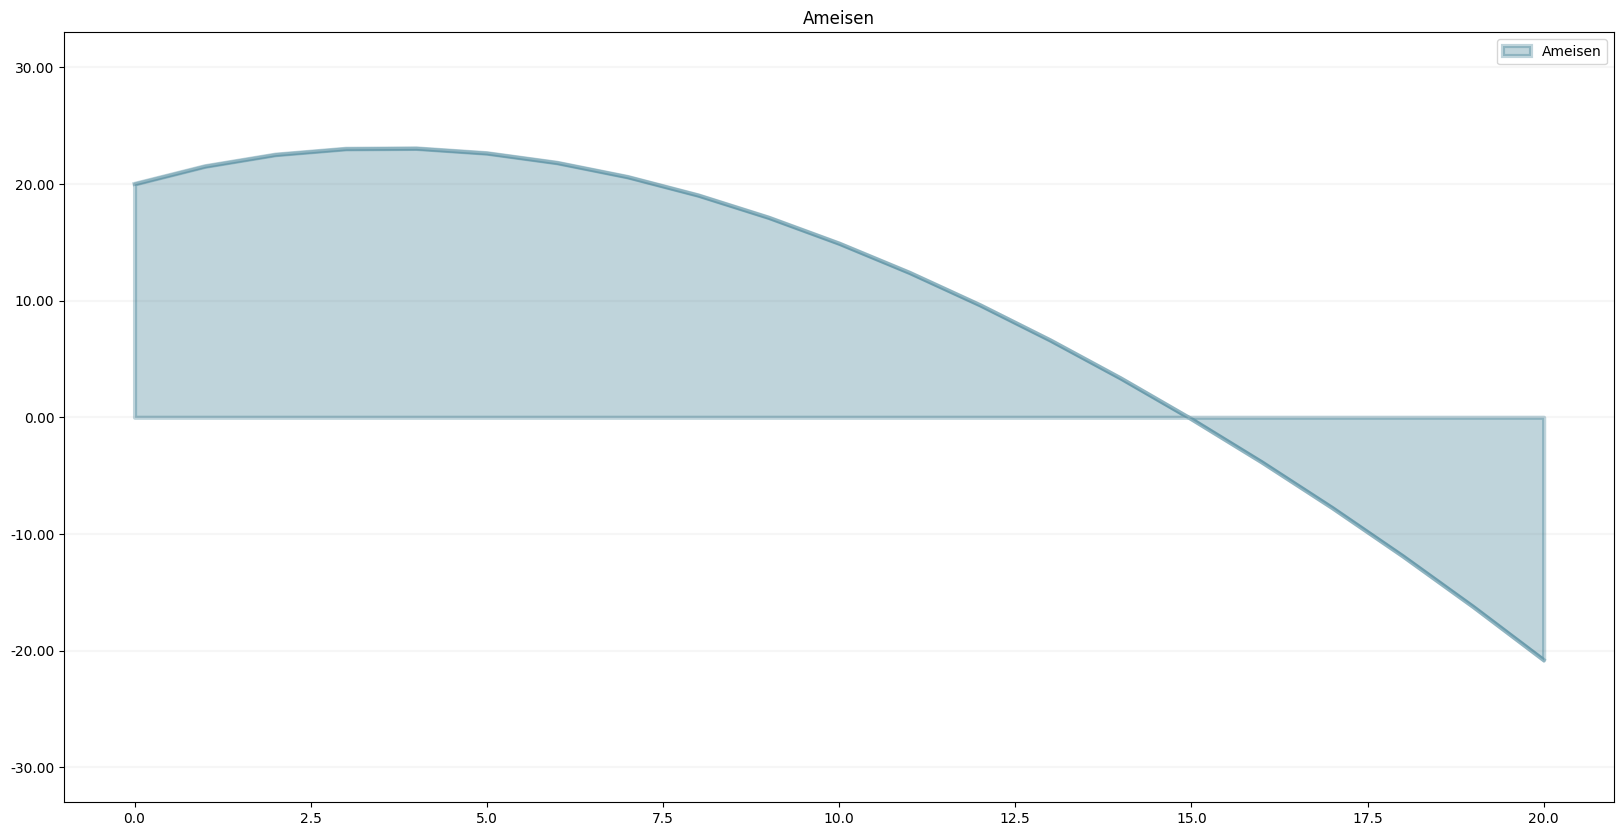

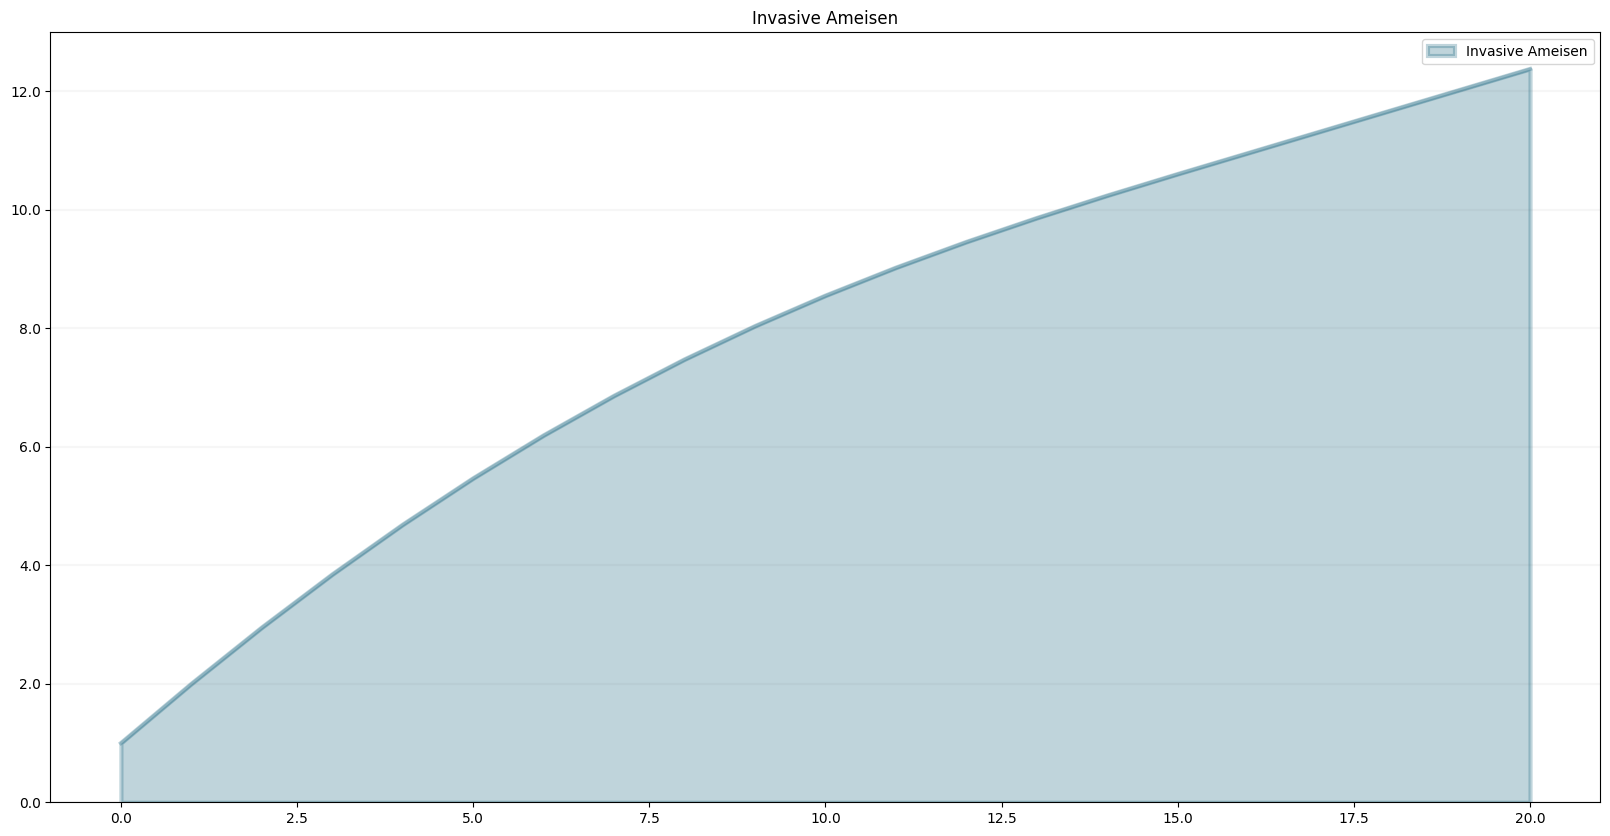

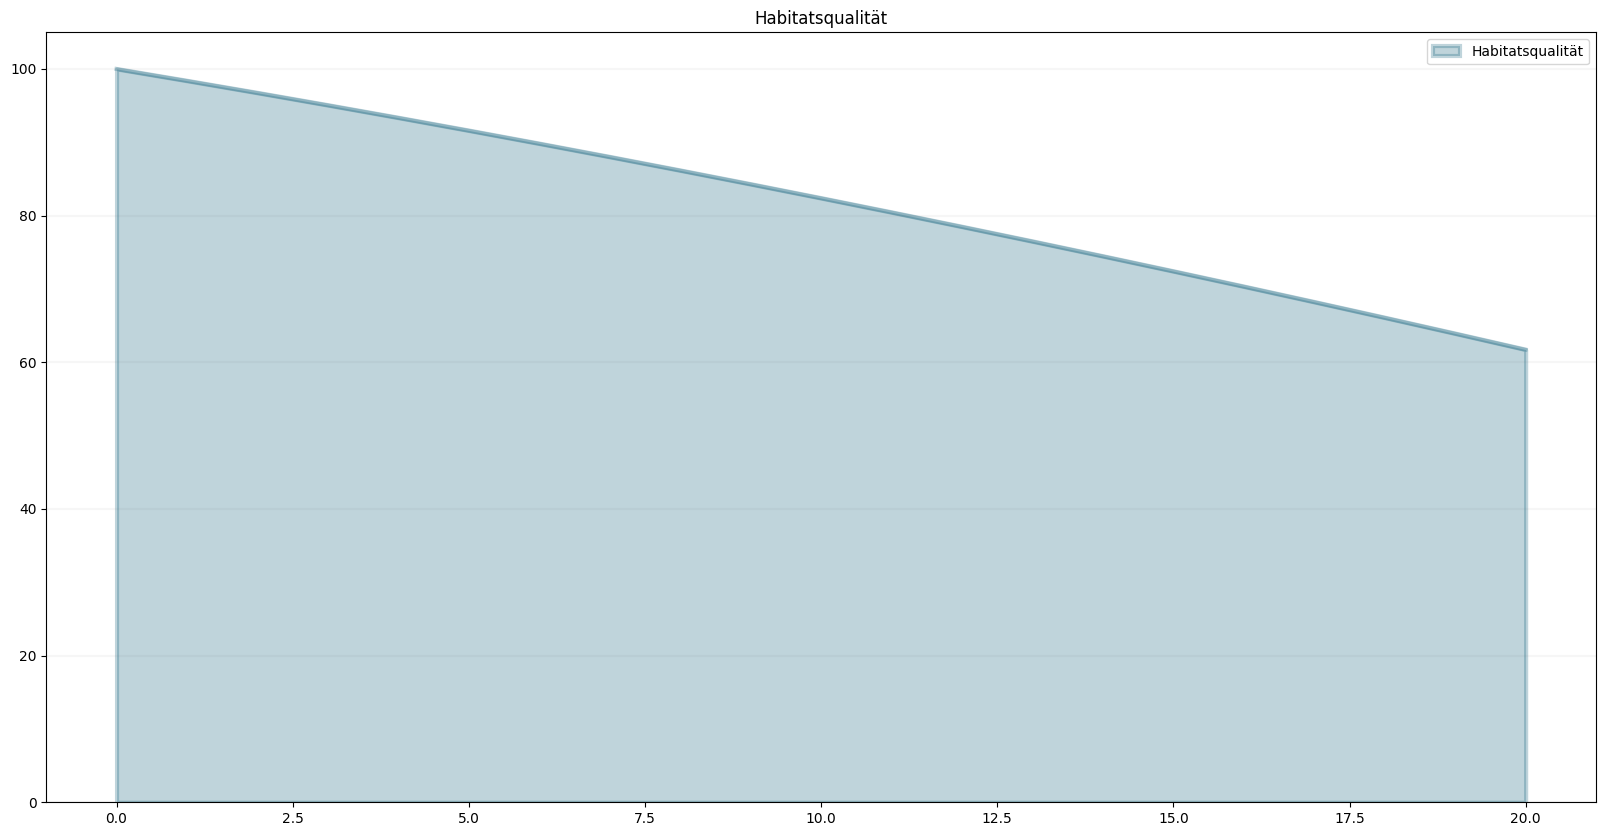

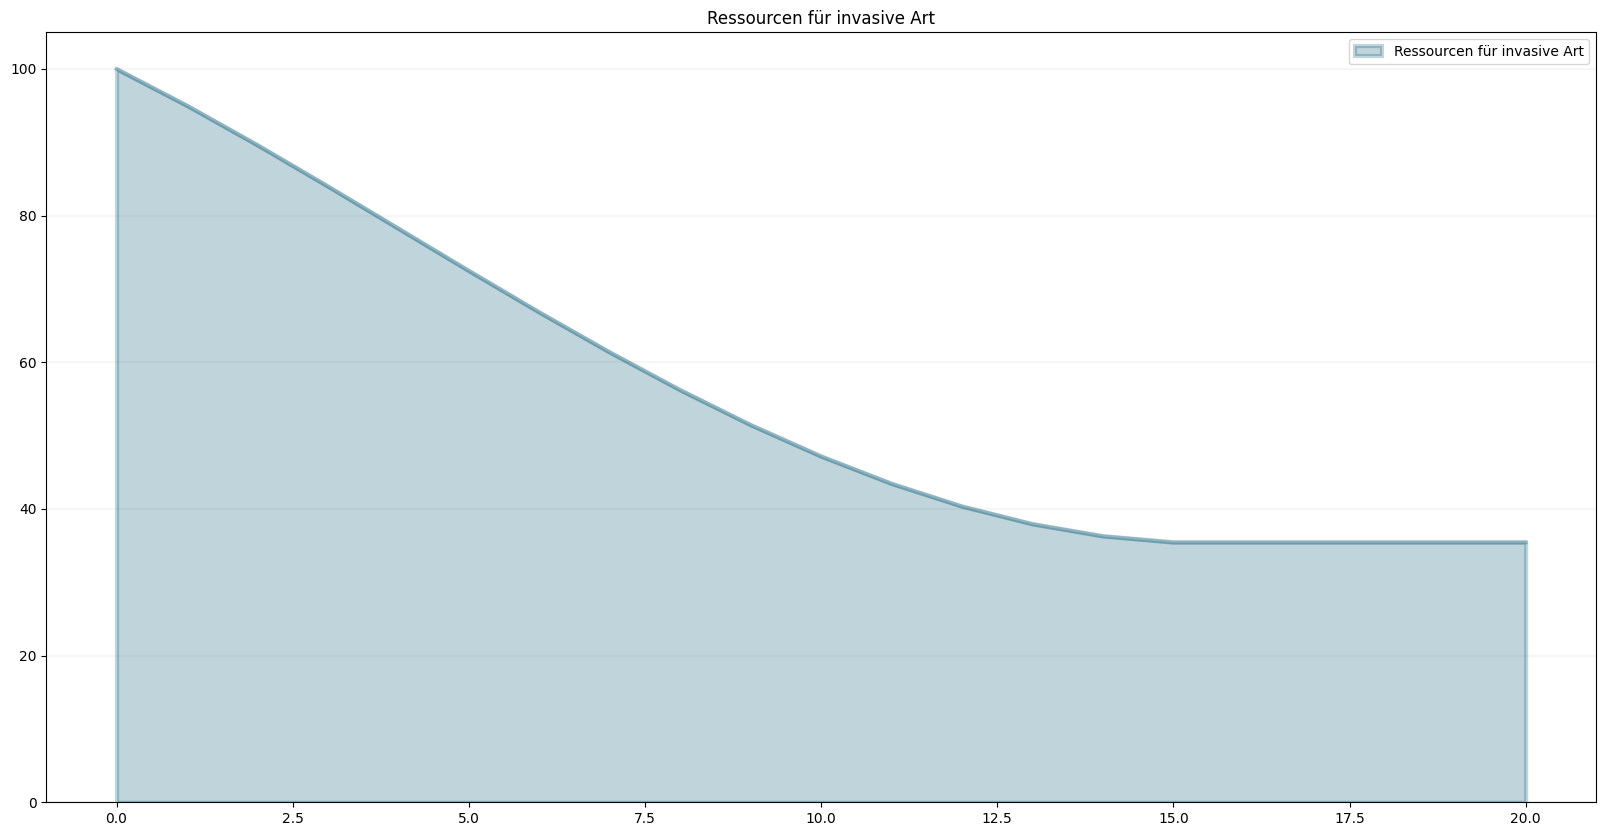

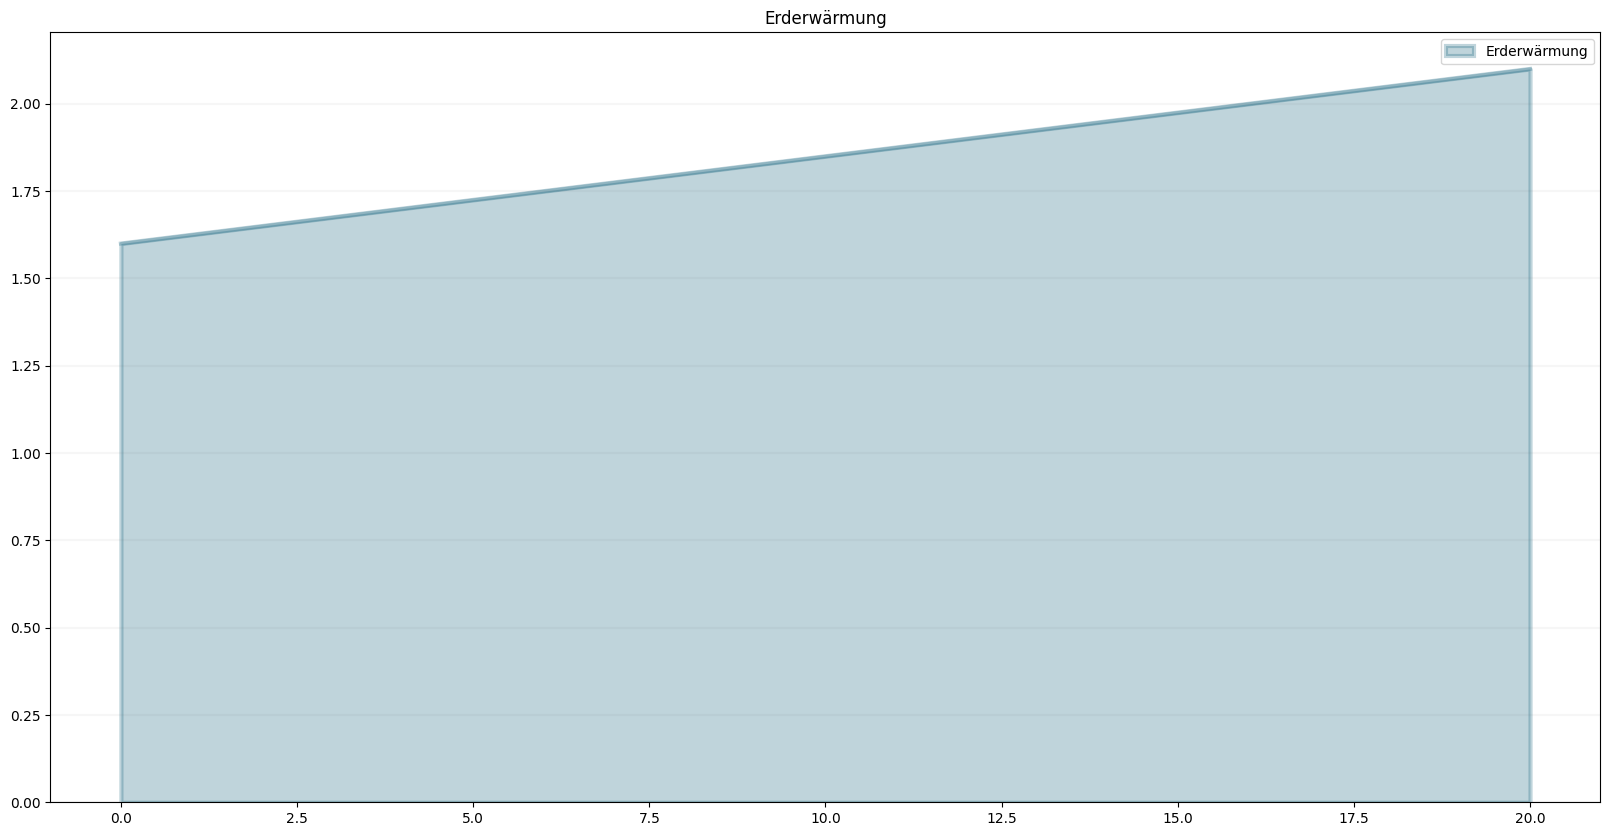

In [7]:
ant_colonies.plot()
invasive.plot()
habitat.plot()
resources.plot()
climate_change.plot()

In [8]:
bptk = bptk()

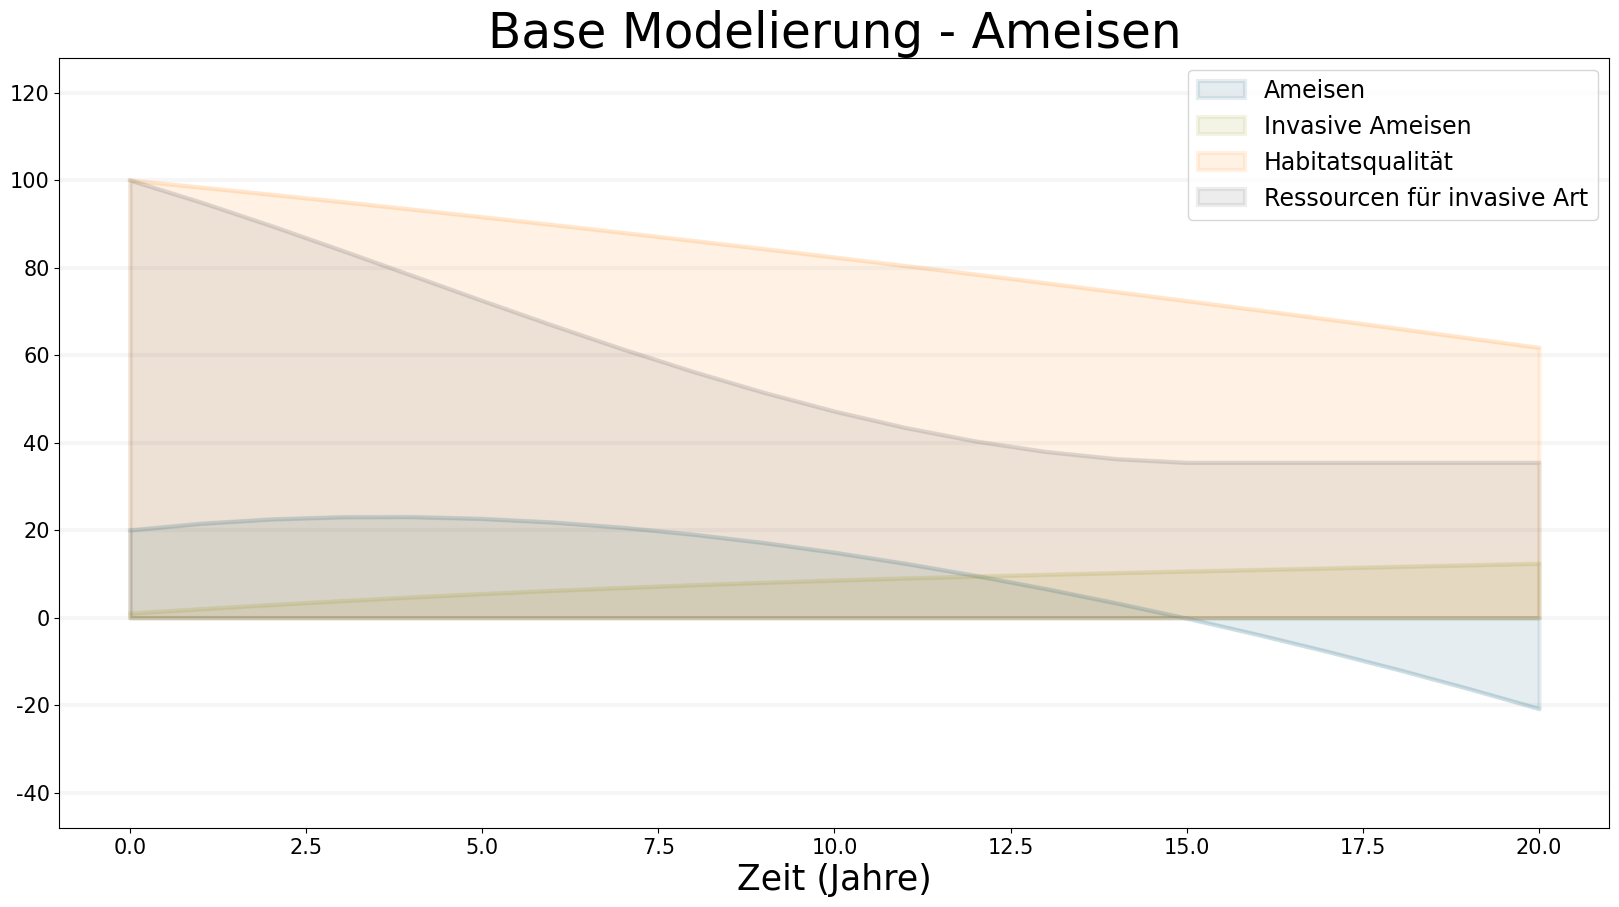

In [9]:
bptk.register_model(model)

bptk.plot_scenarios(
    scenarios="base",
    scenario_managers="smAnts",
    equations=[
        "Ameisen",
        "Invasive Ameisen",
        "Habitatsqualität",
        "Ressourcen für invasive Art"
    ],
    alpha=0.1,
    title="Base Modelierung - Ameisen",
    x_label="Zeit (Jahre)"
)

**Versuch verschiedener Szenarien:**

Geht noch nicht!

In [10]:
scenario_manager = {
    "smAnts":{
        "model": model,
        "base_constants": {
            "ant_colonies": 20.0,
            "invasive": 1.0,
            "habitat": 100.0,
            "resources": 100.0,
            "climate_change": 1.6
        }
    }
}

bptk.register_scenario_manager(scenario_manager)

In [11]:
bptk.register_scenarios(
    scenario_manager="smAnts",
    scenarios = {
        "Test": {
            "constants": {
                "Invasive Ameisen": 2.0
            }
        }
    })

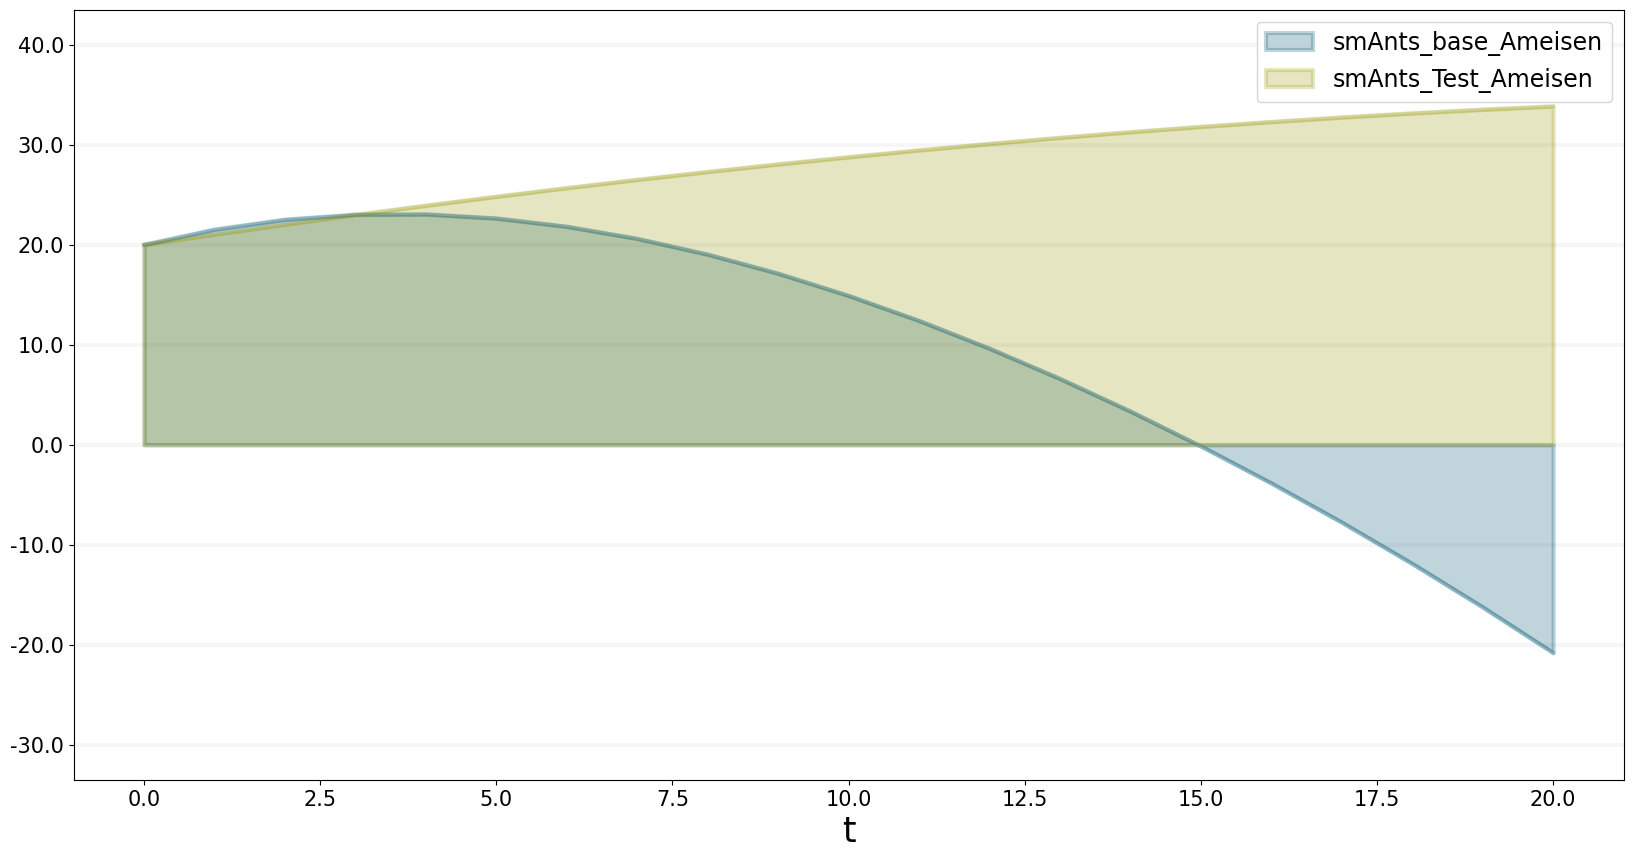

In [12]:
bptk.plot_scenarios(
    scenarios=["base", "Test"],
    scenario_managers="smAnts",
    equations=["Ameisen"],
    series_names={}
)